In [1]:
import pyDR

In [2]:
proj=pyDR.Project('N15data',create=True)    
proj=pyDR.Project()

In [3]:
proj.append_data('ubq1_15N.txt')

/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [4]:
d=proj[0]

                   0           1           2
Type              R1          R1          R1
v0               500         600         850
v1                 0           0           0
vr                 0           0           0
offset             0           0           0
stdev     0.02999999  0.02300000  0.00700000
med_val          nan         nan         nan
Nuc              15N         15N         15N
Nuc1              1H          1H          1H
dXY         -22954.8    -22954.8    -22954.8
CSA            113.0       113.0       113.0
eta                0           0           0
CSoff              0           0           0
QC                 0           0           0
etaQ               0           0           0
theta           23.0        23.0        23.0

[3 experiments with 16 parameters]


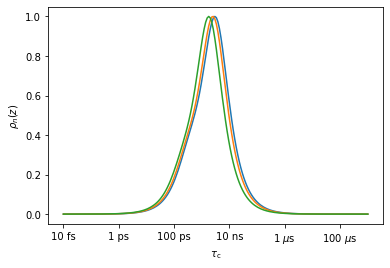

In [5]:
d.sens.plot_rhoz(norm=True)  #This will plot the sensitivities of the experiments you included
print(d.sens.info) #See the parameters describing your experiments. 

In [6]:
molsys=pyDR.MolSys(topo="../../tests/1ubq_data/1ubq_frame.pdb",traj_files="../../tests/1ubq_data/test_001/run_001/traj_4us_PBC_fit.xtc") 

In [7]:
d.select=pyDR.MolSelect(molsys)

In [8]:
resids=[3, 5, 7, 8, 13, 23, 30, 36, 44, 61]

In [9]:
d.select.select_bond(Nuc='15N',resids=resids)

In [13]:
d.detect.r_auto(3)  #Automatically create 4 detectors to process the data
#d.detect.inclS2()   #Create a 5th detector based on inclusion of S2 (REDOR) data. Comment if no S2 included!
d.detect.plot_rhoz()

LinAlgError: SVD did not converge

In [ ]:
f=d.fit() #Fit the experimental data (assignment to f is optional. f is automatically appended to project)
print(proj) #See that the processed data is in the project

AssertionError: Detector object must first be optimized (e.g. run data.detect.r_auto)

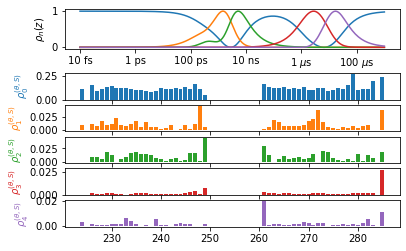

In [ ]:
proj['proc'].plot(style='bar') #plot all processed data to single plot (here just one data set)